# Figure 2: Exceedance probability and net zero achievement

In [1]:
import pyam
import matplotlib.pyplot as plt 
import seaborn as sns 
from pathlib import Path 
from matplotlib.lines import Line2D
import string 
plt.style.use("plotting_template.mplstyle")

<IPython.core.display.Javascript object>

# Read in the necessary data
## Special report on 1.5°C

In [2]:
data_folder = Path("../data")

In [3]:
variables_of_interest = [ 
    "AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 °C|MAGICC6", 
    "AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 °C|MAGICC6"
]

In [4]:
df_sr15 = pyam.IamDataFrame( 
    Path(data_folder / "sr15_downselected.xlsx")
)

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file ../data/sr15_downselected.xlsx
pyam.core - INFO: Reading meta indicators


In [5]:
df_sr15.load_meta( 
    Path(data_folder / "sr15_updated_meta.xlsx")
)

pyam.core - INFO: Reading meta indicators


In [6]:
df_sr15.filter(
    variable = variables_of_interest, 
    inplace = True 
)

## ENGAGE data 

In [7]:
df_engage = pyam.IamDataFrame( 
    Path(data_folder / "engage_downselected.xlsx")
)

pyam.core - INFO: Reading file ../data/engage_downselected.xlsx
pyam.core - INFO: Reading meta indicators


In [8]:
df_engage.load_meta(
    Path(data_folder / "engage_updated_meta.xlsx")
)

pyam.core - INFO: Reading meta indicators


In [9]:
df_engage.rename(
    variable = {
        'AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 degC|MAGICC6': 'AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 °C|MAGICC6', 
        'AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 degC|MAGICC6' : 'AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 °C|MAGICC6'
    }, 
    inplace = True 
)

In [10]:
df_engage.filter(
    variable = variables_of_interest, 
    inplace = True
)

In [11]:
df_analysis = df_engage.append(df_sr15)

# Analysis
## Assigning peak exceedance probability

In [12]:
def peak_estimation(df):
    peak = df[df == df.max()]
    return float(max(peak))

In [13]:
exc_1p5 = (
    df_analysis.filter(
        variable = "AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 °C|MAGICC6"
    )
    .timeseries()
)

In [14]:
exc_2p0 = (
    df_analysis.filter( 
        variable = "AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 °C|MAGICC6"
    )
    .timeseries()
)

In [15]:
df_analysis.set_meta(
    exc_1p5.apply(peak_estimation, axis=1), 
    name = "peak_exceedance_1p5"
)

In [16]:
df_analysis.set_meta(
    exc_1p5[2100], 
    name = "exceedance_1p5_2100"
)

In [17]:
df_analysis.set_meta(
    exc_2p0.apply(peak_estimation, axis=1), 
    name = "peak_exceedance_2p0"
)

# Plot

In [18]:
plot_data = (
    df_analysis
    .filter(category = ["Above 2C", "Higher 2C"], keep=False)
    .meta[
        [
            "netzero", 
            "peak_exceedance_1p5", 
            "peak_exceedance_2p0", 
            "exceedance_1p5_2100", 
            "category"
        ]
    ]
)

In [19]:
color_list = [ 
    "#069f72", # 1.5C low overshoot
    "#cc79a7", # Lower 2C
    "#0773b2", # 1.5C high overshoot
    "#5cb4e4" # Below 1.5C
]

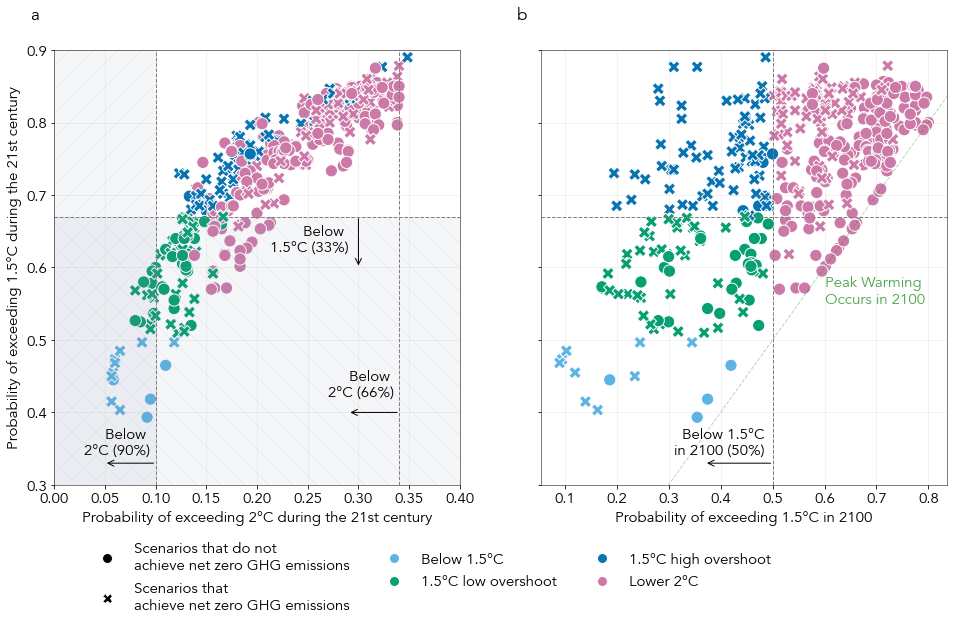

In [20]:
fig, ax = plt.subplots(1,2, figsize=(16,8), sharey=True)

colors = ["#e76562", "#8ad0e2"]
sns.set_palette(sns.color_palette(color_list))

p = sns.scatterplot(
    data = plot_data, 
    x = "peak_exceedance_2p0", 
    y = "peak_exceedance_1p5", 
    hue="category",
    s=150, 
    style="netzero", 
    legend = False, 
    ax = ax[0]
)
ax[0].set_ylim(0.3,0.9)
ax[0].set_xlim(0,0.4)
ax[0].set_xlabel("Probability of exceeding 2°C during the 21st century")
ax[0].set_ylabel("Probability of exceeding 1.5°C during the 21st century")
ax[0].axvline(0.1, linestyle="dashed", color="grey")
ax[0].axvline(0.34, linestyle="dashed", color="grey")
ax[0].axhline(0.67, linestyle="dashed", color="grey")

legend_elements_ax0 = [ 
    Line2D([0], [0], marker='o', color='w', label = "Scenarios that do not \nachieve net zero GHG emissions", markerfacecolor="#e76562"), 
    Line2D([0], [0], marker='o', color='w', label = "Scenarios that \nachieve net zero GHG emissions", markerfacecolor="#8ad0e2")
]

# Arrow annotations
## Draw arrows
ax[0].annotate(
    "", 
    xy = (0.1, 0.33), 
    xytext = (0.05, 0.33), 
    xycoords="data", 
    arrowprops=dict(
        arrowstyle="<-"
    )
)
ax[0].annotate(
    "", 
    xy = (0.34, 0.40), 
    xytext = (0.29, 0.40), 
    xycoords="data", 
    arrowprops=dict(
        arrowstyle="<-"
    )
)

## Annotate arrows
ax[0].annotate(
    "Below \n2°C (66%)", 
    xy=(0.335, 0.42), 
    ha="right"
)

ax[0].annotate(
    "Below \n2°C (90%)", 
    xy=(0.095, 0.34), 
    ha="right"
)

q = sns.scatterplot(
    data = plot_data, 
    y = "peak_exceedance_1p5", 
    x = "exceedance_1p5_2100", 
    hue = "category", 
    s = 150, 
    style = "netzero",
    legend = False, 
    ax = ax[1]
)
ax[1].set_xlabel("Probability of exceeding 1.5°C in 2100")

common_elements = {
    "color":"w", 
    "markersize":10
}

# Custom legend 
legend_elements = [ 
    Line2D([0], [0], marker='o',label = "Scenarios that do not \nachieve net zero GHG emissions", markerfacecolor="black", **common_elements), 
    Line2D([0], [0], marker='X', label = "Scenarios that \nachieve net zero GHG emissions", markerfacecolor="black", **common_elements),
    Line2D([0], [0], marker="o", label = "Below 1.5°C", markerfacecolor="#5cb4e4", **common_elements),
    Line2D([0], [0], marker="o", label = "1.5°C low overshoot", markerfacecolor="#069f72", **common_elements),
    Line2D([0], [0], marker="o", label = "1.5°C high overshoot", markerfacecolor="#0773b2", **common_elements), 
    Line2D([0], [0], marker="o", label = "Lower 2°C", markerfacecolor="#cc79a7", **common_elements), 
]

ax[0].legend(handles=legend_elements, bbox_to_anchor = (1.8, -0.1), ncol=3)
ax[1].axvline(0.5, linestyle="dashed", color="grey")
ax[1].axhline(0.67, linestyle="dashed", color="grey")

# Arrow annotations
## Draw arrows
ax[1].annotate(
    "", 
    xy = (0.5, 0.33), 
    xytext = (0.37, 0.33), 
    xycoords="data", 
    arrowprops=dict(
        arrowstyle="<-"
    )
)

ax[0].annotate(
    "", 
    xy = (0.3, 0.67), 
    xytext = (0.3, 0.60), 
    xycoords="data", 
    arrowprops=dict(
        arrowstyle="<-"
    )
)

## Annotate arrows
ax[1].annotate(
    "Below 1.5°C\nin 2100 (50%)", 
    xy=(0.485, 0.34), 
    ha="right"
)
ax[0].annotate(
    "Below \n1.5°C (33%)", 
    xy = (0.29, 0.62), 
    ha = "right"
)

#
line = Line2D([0, 1], [0, 1], color='green', linestyle="dashed", alpha=0.3)
#transform = ax[1].transAxes
#line.set_transform(transform)
ax[1].add_line(line)

ax[1].annotate(
    "Peak Warming\nOccurs in 2100", 
    xy = (0.6, 0.55), 
    ha = "left", 
    color = "green", 
    alpha=0.7
)

# Annotations
for n,a in enumerate(ax):
    a.text(
        -0.06, 1.07, 
        string.ascii_lowercase[n], 
        transform=a.transAxes,
        size=17, 
        weight='bold'
    )

# Shade region 

ax[0].fill_between(
    [0, 0.10], 
    0.9, 
    alpha=0.08, 
    color="#808eaf", 
    hatch = "/"
)

ax[0].fill_between(
    [0, 0.40], 
    0.67, 
    alpha=0.08, 
    color="#808eaf", 
    hatch = "\\"
)

In [21]:
fig.savefig(
    Path("figures/Figure 1.png"), 
    dpi = 1000
)

# Stats for Table 1

In [22]:
plot_data.groupby("category")["peak_exceedance_1p5"].describe(
    percentiles = [0.25, 0.5, 0.75], 
).round(2)

count  mean   std   min   25%   50%   75%   max
category                                                            
1.5C high overshoot   76.0  0.76  0.05  0.67  0.72  0.75  0.80  0.89
1.5C low overshoot    69.0  0.60  0.05  0.51  0.56  0.60  0.64  0.67
Below 1.5C            13.0  0.45  0.03  0.39  0.42  0.46  0.47  0.50
Lower 2C             261.0  0.77  0.07  0.57  0.74  0.79  0.83  0.88

In [23]:
plot_data.groupby("category")["peak_exceedance_2p0"].describe(
    percentiles = [0.25, 0.5, 0.75], 
).round(2)

count  mean   std   min   25%   50%   75%   max
category                                                            
1.5C high overshoot   76.0  0.20  0.05  0.12  0.17  0.19  0.22  0.35
1.5C low overshoot    69.0  0.12  0.02  0.08  0.11  0.13  0.13  0.17
Below 1.5C            13.0  0.08  0.02  0.06  0.06  0.06  0.09  0.12
Lower 2C             261.0  0.25  0.05  0.14  0.21  0.26  0.30  0.34

In [24]:
plot_data.groupby("category")["exceedance_1p5_2100"].describe(
    percentiles = [0.25, 0.5, 0.75], 
).round(2)

count  mean   std   min   25%   50%   75%   max
category                                                            
1.5C high overshoot   76.0  0.40  0.08  0.20  0.34  0.44  0.47  0.50
1.5C low overshoot    69.0  0.34  0.09  0.17  0.27  0.33  0.44  0.49
Below 1.5C            13.0  0.22  0.12  0.09  0.12  0.19  0.34  0.42
Lower 2C             261.0  0.65  0.08  0.50  0.59  0.66  0.71  0.80